# Car Price Prediction Assignment
### Problem Statement : 
*A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.*

### The company wants to know:

-*Which variables are significant in predicting the price of a car*. 
-*How well those variables describe the price of a car*.

### We are going the follow the given below steps based on CRISP-DM framework :
1. Reading ,understanding and visualising the data.
2. Preparing the data for modelling(train-test split, rescaling etc.)
3. Model building
4. Residual analysis
5. Predictions and evaluation on the test set 


### Step 1 : Reading and Understanding the data
- Importing required libraries
- Understanding the structure of the data

In [1]:
#Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#It is essential to display all the columns under one screen to get better insights.By default,Python displays top few and last few columns. 
pd.set_option('display.max_columns',130)

#Setting properties for floating point numbers
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Read the dataset
cars_df = pd.read_csv("CarPrice_Assignment.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


In [4]:
#Number of rows/columns
cars_df.shape

(205, 26)

*We have details of 205 cars, with 26 features*

In [5]:
#Checking the metrics
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,1.00,-2.00,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,52.00,0.00,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,103.00,1.00,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,154.00,2.00,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,205.00,3.00,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


*It can be inferred from above metrics that 75% of the data points are under price 16,503 , About 25% data is spread between 16,503 and 45,400(max value)*


In [6]:
#Checking data type and missing values
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Step 2: Data Cleaning and Preparation for data modelling 

In [7]:
#Check for duplicates and drop if any
cars_df.duplicated()
cars_df.drop_duplicates(keep='first')

#checking shape again
cars_df.shape

(205, 26)

*Number of rows remains the same .Hence we can infer that there are no duplicate rows in the dataframe*

In [8]:
#The columns with object dtype are the possible categorical features.
mylist = list(cars_df.select_dtypes(include=['object']).columns)
mylist

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
#Converting df to uppercase
cars_df[mylist] = cars_df[mylist].apply(lambda x: x.astype(str).str.upper())
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,ALFA-ROMERO GIULIA,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.60,168.80,64.10,48.80,2548,DOHC,FOUR,130,MPFI,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,ALFA-ROMERO STELVIO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.60,168.80,64.10,48.80,2548,DOHC,FOUR,130,MPFI,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,ALFA-ROMERO QUADRIFOGLIO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.50,171.20,65.50,52.40,2823,OHCV,SIX,152,MPFI,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,AUDI 100 LS,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.80,176.60,66.20,54.30,2337,OHC,FOUR,109,MPFI,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,AUDI 100LS,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.40,176.60,66.40,54.30,2824,OHC,FIVE,136,MPFI,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


#### Converting object datatypes to categorical dtype using typecasting because they make the operations on such columns much faster than the object dtype

In [10]:
#Converting object dtype to categorical dtype
cars_df['CarName'] = cars_df['CarName'].astype('category')
cars_df['fueltype'] = cars_df['fueltype'].astype('category')
cars_df['aspiration'] = cars_df['aspiration'].astype('category')
cars_df['doornumber'] = cars_df['doornumber'].astype('category')
cars_df['carbody'] = cars_df['carbody'].astype('category')
cars_df['drivewheel'] = cars_df['drivewheel'].astype('category')
cars_df['enginelocation'] = cars_df['enginelocation'].astype('category')
cars_df['enginetype'] = cars_df['enginetype'].astype('category')
cars_df['cylindernumber'] = cars_df['cylindernumber'].astype('category')
cars_df['fuelsystem'] = cars_df['fuelsystem'].astype('category')


In [11]:
#validate the results of conversion
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null

In [12]:
#Deriving carCompany from CarName using split function
cars_df['carCompany'] = cars_df['CarName'].astype(str).str.split().str[0]
cars_df['carCompany'].head()



0    ALFA-ROMERO
1    ALFA-ROMERO
2    ALFA-ROMERO
3           AUDI
4           AUDI
Name: carCompany, dtype: object

In [13]:
#Converting carCompany to categorical dtype
cars_df['carCompany'] = cars_df['carCompany'].astype('category')

In [14]:
#Removing Carname variable as we have derived carcompany which we can use for further analysis
cars_df.drop(['CarName'],axis=1,inplace=True)
cars_df.shape

(205, 26)

In [15]:
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,1,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.60,168.80,64.10,48.80,2548,DOHC,FOUR,130,MPFI,3.47,2.68,9.00,111,5000,21,27,"13,495.00",ALFA-ROMERO
1,2,3,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.60,168.80,64.10,48.80,2548,DOHC,FOUR,130,MPFI,3.47,2.68,9.00,111,5000,21,27,"16,500.00",ALFA-ROMERO
2,3,1,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.50,171.20,65.50,52.40,2823,OHCV,SIX,152,MPFI,2.68,3.47,9.00,154,5000,19,26,"16,500.00",ALFA-ROMERO
3,4,2,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.80,176.60,66.20,54.30,2337,OHC,FOUR,109,MPFI,3.19,3.40,10.00,102,5500,24,30,"13,950.00",AUDI
4,5,2,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.40,176.60,66.40,54.30,2824,OHC,FIVE,136,MPFI,3.19,3.40,8.00,115,5500,18,22,"17,450.00",AUDI


### EDA - Visualise the data to see if price follows some sort of linear relationship with the predictor variables

#### Univariate Analysis 

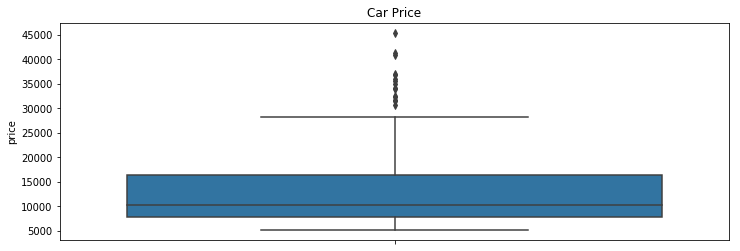

In [16]:

# Check distribution of Price 

plt.figure(figsize=(12,4))
plt.title('Car Price')
sns.boxplot(y=cars_df.price)

plt.show()

*most of the price is between 7000 and 16000 , there seems to be some outliers *

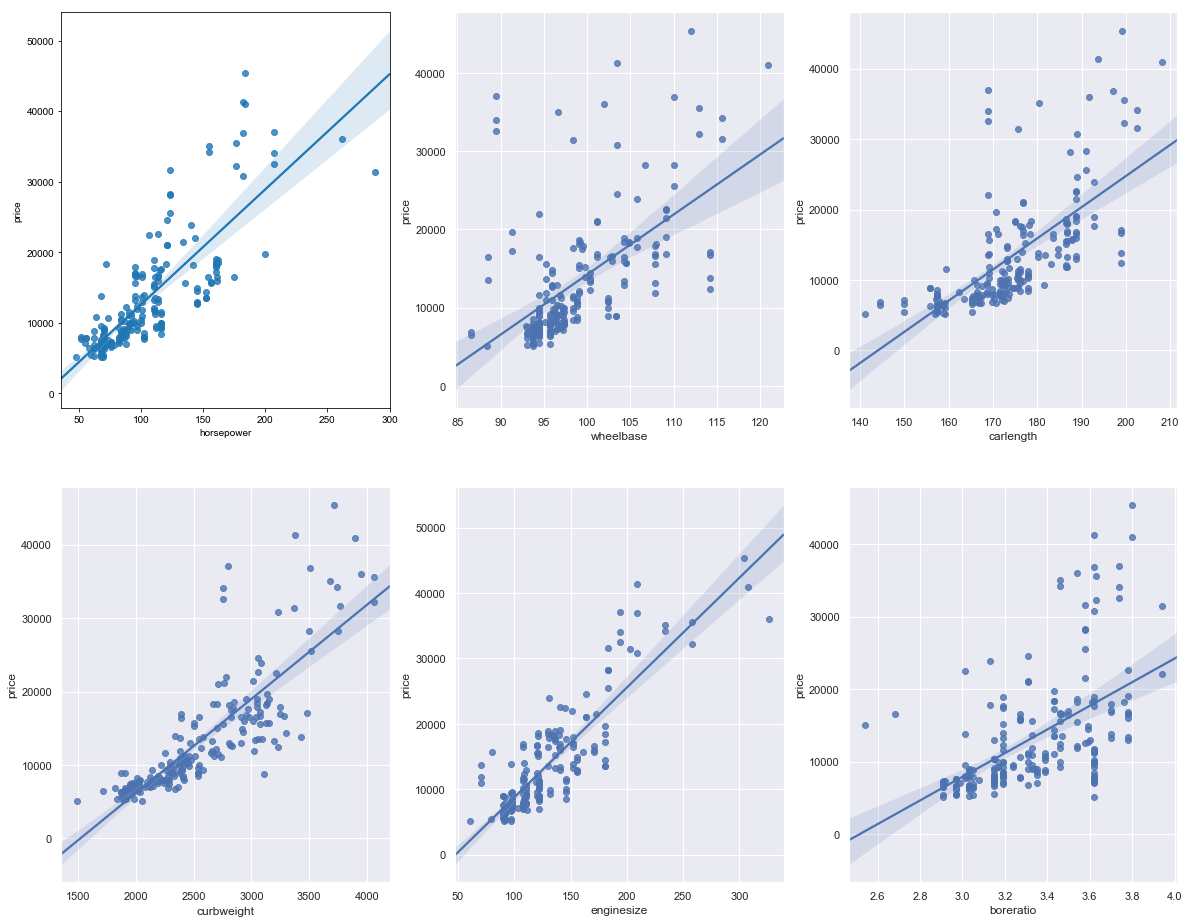

In [17]:
#Visualising numeric variables
#horsepower vs price
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.set(style="darkgrid")
sns.regplot(x="horsepower",
            y="price",
            data=cars_df)
#wheelbase vs price
plt.subplot(2,3,2)
sns.set(style="darkgrid")
sns.regplot(x="wheelbase",
            y="price",
            data=cars_df)
#carlength vs price
plt.subplot(2,3,3)
sns.set(style="darkgrid")
sns.regplot(x="carlength",
            y="price",
            data=cars_df)
#curbweight vs price
plt.subplot(2,3,4)
sns.set(style="darkgrid")
sns.regplot(x="curbweight",
            y="price",
            data=cars_df)
#enginesize vs price
plt.subplot(2,3,5)
sns.set(style="darkgrid")
sns.regplot(x="enginesize",
            y="price",
            data=cars_df)
#boreratio vs price
plt.subplot(2,3,6)
sns.set(style="darkgrid")
sns.regplot(x="boreratio",
            y="price",
            data=cars_df)
plt.show()


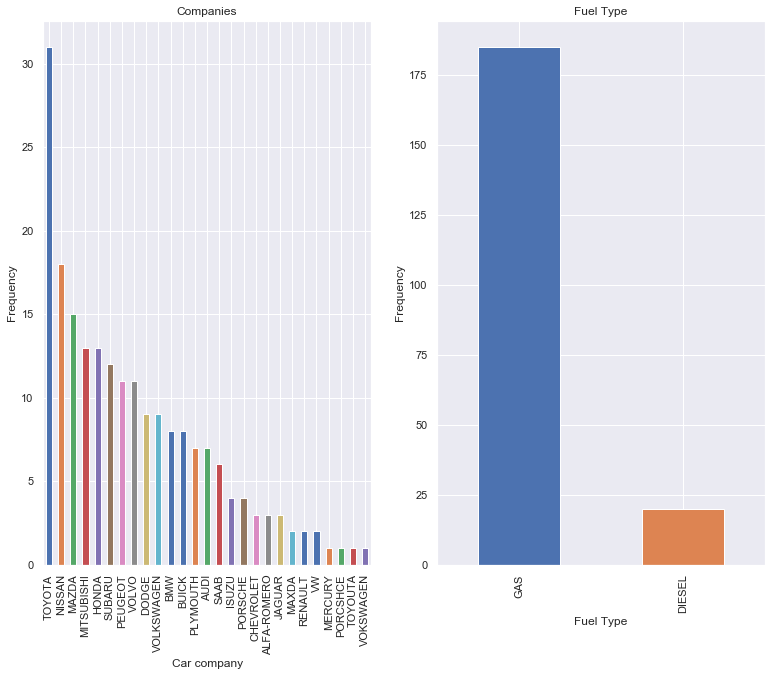

In [18]:
#Visualising categorical variables

plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt1 = cars_df.carCompany.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car company', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = cars_df.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency')


plt.show()

*Toyota cars seems to be more popular , Also frequency of gas based cars is more as compared to diesel.*

### Bivariate Analysis

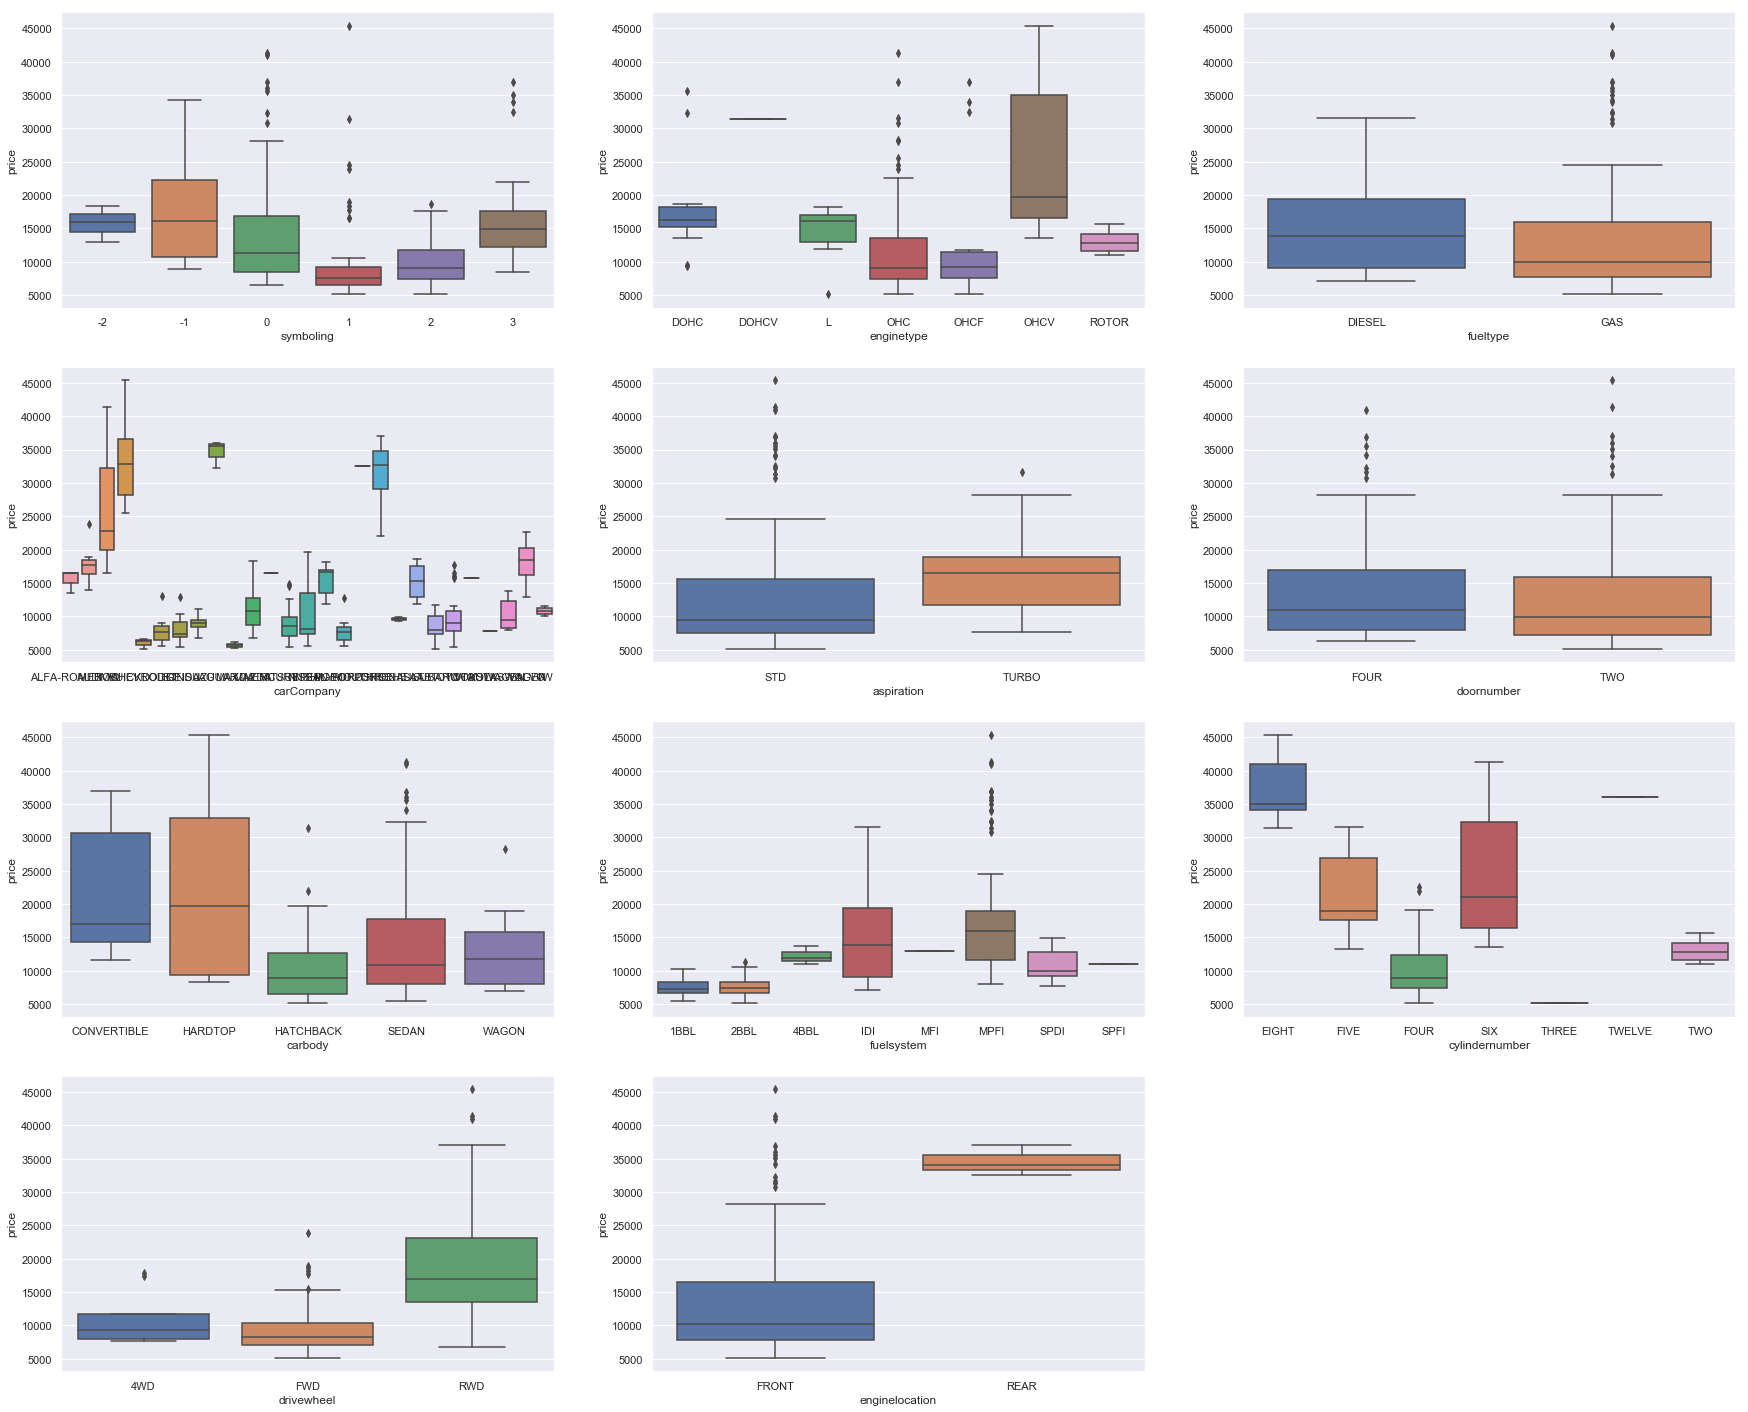

In [19]:
#visualising categorical variables 
plt.figure(figsize=(30,25))
#symboling vs price
plt.subplot(4,3,1)
sns.boxplot(x='symboling',y='price',data=cars_df)
#Visualise enginetype vs price
plt.subplot(4,3,2)
sns.boxplot(x='enginetype',y='price',data=cars_df)
#Visualise fueltype vs price
plt.subplot(4,3,3)
sns.boxplot(x='fueltype',y='price',data=cars_df)
#symboling carCompany vs price
plt.subplot(4,3,4)
sns.boxplot(x='carCompany',y='price',data=cars_df)
#Visualise aspiration vs price
plt.subplot(4,3,5)
sns.boxplot(x='aspiration',y='price',data=cars_df)
#Visualise doornumber vs price
plt.subplot(4,3,6)
sns.boxplot(x='doornumber',y='price',data=cars_df)
#Visualise carbody vs price
plt.subplot(4,3,7)
sns.boxplot(x='carbody',y='price',data=cars_df)
#Visualise fuelsystem vs price
plt.subplot(4,3,8)
sns.boxplot(x='fuelsystem',y='price',data=cars_df)
#Visualise cylindernumber vs price
plt.subplot(4,3,9)
sns.boxplot(x='cylindernumber',y='price',data=cars_df)
#Visualise drivewheel vs price
plt.subplot(4,3,10)
sns.boxplot(x='drivewheel',y='price',data=cars_df)
#Visualise enginelocation vs price
plt.subplot(4,3,11)
sns.boxplot(x='enginelocation',y='price',data=cars_df)



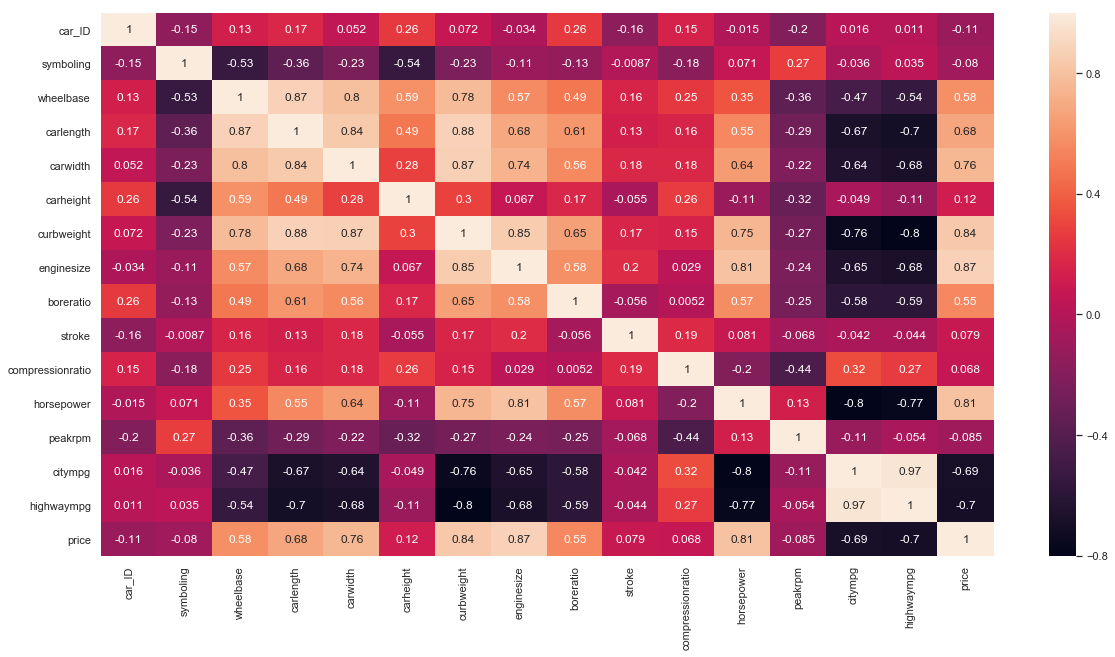

In [20]:
#Correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(cars_df.corr(),annot = True)
plt.show()

* Features -[carlength,carwidth,curbweight,enginesize horspower,citympg,highwaympg ] are highly correlated with price of car.


#### Converting categorical variables to numeric values - Regression works on numerical values 

We are going to use -:
- One-Hot Encoding - creation of dummy varibles from categorical data. One-Hot encoding has the benefit of not weighting a value improperly.

In [21]:
#Categorical features
mylist = list(cars_df.select_dtypes(include=['category']).columns)
mylist

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'carCompany']

In [22]:
#checking unique values across each categorical variable
print(cars_df['fueltype'].unique())
print(cars_df['doornumber'].unique())
print(cars_df['aspiration'].unique())
print(cars_df['carbody'].unique())
print(cars_df['drivewheel'].unique())
print(cars_df['enginelocation'].unique())
print(cars_df['enginetype'].unique())
print(cars_df['fuelsystem'].unique())
print(cars_df['cylindernumber'].unique())
print(cars_df['carCompany'].unique())



[GAS, DIESEL]
Categories (2, object): [GAS, DIESEL]
[TWO, FOUR]
Categories (2, object): [TWO, FOUR]
[STD, TURBO]
Categories (2, object): [STD, TURBO]
[CONVERTIBLE, HATCHBACK, SEDAN, WAGON, HARDTOP]
Categories (5, object): [CONVERTIBLE, HATCHBACK, SEDAN, WAGON, HARDTOP]
[RWD, FWD, 4WD]
Categories (3, object): [RWD, FWD, 4WD]
[FRONT, REAR]
Categories (2, object): [FRONT, REAR]
[DOHC, OHCV, OHC, L, ROTOR, OHCF, DOHCV]
Categories (7, object): [DOHC, OHCV, OHC, L, ROTOR, OHCF, DOHCV]
[MPFI, 2BBL, MFI, 1BBL, SPFI, 4BBL, IDI, SPDI]
Categories (8, object): [MPFI, 2BBL, MFI, 1BBL, SPFI, 4BBL, IDI, SPDI]
[FOUR, SIX, FIVE, THREE, TWELVE, TWO, EIGHT]
Categories (7, object): [FOUR, SIX, FIVE, THREE, TWELVE, TWO, EIGHT]
[ALFA-ROMERO, AUDI, BMW, CHEVROLET, DODGE, ..., TOYOUTA, VOKSWAGEN, VOLKSWAGEN, VW, VOLVO]
Length: 27
Categories (27, object): [ALFA-ROMERO, AUDI, BMW, CHEVROLET, ..., VOKSWAGEN, VOLKSWAGEN, VW, VOLVO]


###### Creation of Dummy variables for categorical features . We will be creating K-1 dummy variables for K category levels . 

In [23]:
#Take backup of cars_df 
cars_df_bckup = cars_df.copy()
cars_df2 = pd.get_dummies(cars_df_bckup, columns=['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
'carCompany'], prefix = ['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem','carCompany'],drop_first=True)
cars_df2.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_GAS,aspiration_TURBO,doornumber_TWO,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginelocation_REAR,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,cylindernumber_FIVE,cylindernumber_FOUR,cylindernumber_SIX,cylindernumber_THREE,cylindernumber_TWELVE,cylindernumber_TWO,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,carCompany_AUDI,carCompany_BMW,carCompany_BUICK,carCompany_CHEVROLET,carCompany_DODGE,carCompany_HONDA,carCompany_ISUZU,carCompany_JAGUAR,carCompany_MAXDA,carCompany_MAZDA,carCompany_MERCURY,carCompany_MITSUBISHI,carCompany_NISSAN,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_TOYOUTA,carCompany_VOKSWAGEN,carCompany_VOLKSWAGEN,carCompany_VOLVO,carCompany_VW
0,1,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,"13,495.00",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,"16,500.00",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,"16,500.00",1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,"13,950.00",1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,"17,450.00",1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#car id will not add value to analysis ,hence dropping 
cars_df2.drop(['car_ID'],axis=1,inplace=True)

###### Now we have completed the conversion of categorical features to numeric columns , Resultant dataframe cars_df2 is now ready for the modelling using Regression 

### Step 3 : Data Modelling 

#### Splitting into training and testing datasets

In [25]:
df_train,df_test = train_test_split(cars_df2,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 70)
(62, 70)


In [26]:
df_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_GAS', 'aspiration_TURBO', 'doornumber_TWO', 'carbody_HARDTOP',
       'carbody_HATCHBACK', 'carbody_SEDAN', 'carbody_WAGON', 'drivewheel_FWD',
       'drivewheel_RWD', 'enginelocation_REAR', 'enginetype_DOHCV',
       'enginetype_L', 'enginetype_OHC', 'enginetype_OHCF', 'enginetype_OHCV',
       'enginetype_ROTOR', 'cylindernumber_FIVE', 'cylindernumber_FOUR',
       'cylindernumber_SIX', 'cylindernumber_THREE', 'cylindernumber_TWELVE',
       'cylindernumber_TWO', 'fuelsystem_2BBL', 'fuelsystem_4BBL',
       'fuelsystem_IDI', 'fuelsystem_MFI', 'fuelsystem_MPFI',
       'fuelsystem_SPDI', 'fuelsystem_SPFI', 'carCompany_AUDI',
       'carCompany_BMW', 'carCompany_BUICK', 'carCompany_CHEVROLET',
       'carCompany_DODGE', 'carCompany_HONDA', 'carCompany_ISUZU'

#### Next step is Scaling of numeric variables , to bring the variables on same scale .We will be using Normalisation(MinMax scaling) for our analysis, Dummy variables are already in binary hence we need to Scale rest of the numeric variables.

In [27]:
#Instantiate object
obj = MinMaxScaler()
#List of numeric variables to scale
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,1,93.70,167.30,63.80,50.80,2191,98,2.97,3.23,9.40,68,5500,31,38,"7,609.00"
125,3,94.50,168.90,68.30,50.20,2778,151,3.94,3.11,9.50,143,5500,19,27,"22,018.00"
166,1,94.50,168.70,64.00,52.60,2300,98,3.24,3.08,9.40,112,6600,26,29,"9,538.00"
1,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
199,-1,104.30,188.80,67.20,57.50,3157,130,3.62,3.15,7.50,162,5100,17,22,"18,950.00"


In [28]:
#fit and transform the data
df_train[num_vars] = obj.fit_transform(df_train[num_vars])

In [29]:
##Converted the numeric variables in scale of [0,1] using normalisation ,max value - 1 ,min value - 0
df_train[num_vars].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.56,0.41,0.53,0.46,0.51,0.41,0.24,0.50,0.54,0.19,0.23,0.40,0.34,0.37,0.22
std,0.24,0.21,0.20,0.18,0.22,0.21,0.15,0.21,0.16,0.24,0.17,0.20,0.19,0.19,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.27,0.40,0.30,0.35,0.25,0.14,0.31,0.46,0.10,0.09,0.27,0.17,0.22,0.07
50%,0.60,0.34,0.50,0.43,0.52,0.36,0.18,0.50,0.55,0.12,0.19,0.43,0.33,0.38,0.14
75%,0.60,0.50,0.67,0.55,0.67,0.56,0.30,0.68,0.61,0.15,0.28,0.55,0.50,0.53,0.31
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [30]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_GAS,aspiration_TURBO,doornumber_TWO,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginelocation_REAR,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,cylindernumber_FIVE,cylindernumber_FOUR,cylindernumber_SIX,cylindernumber_THREE,cylindernumber_TWELVE,cylindernumber_TWO,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,carCompany_AUDI,carCompany_BMW,carCompany_BUICK,carCompany_CHEVROLET,carCompany_DODGE,carCompany_HONDA,carCompany_ISUZU,carCompany_JAGUAR,carCompany_MAXDA,carCompany_MAZDA,carCompany_MERCURY,carCompany_MITSUBISHI,carCompany_NISSAN,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORCSHCE,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_TOYOUTA,carCompany_VOKSWAGEN,carCompany_VOLKSWAGEN,carCompany_VOLVO,carCompany_VW
122,0.60,0.24,0.43,0.29,0.27,0.27,0.14,0.23,0.53,0.15,0.08,0.55,0.50,0.57,0.07,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125,1.00,0.27,0.45,0.67,0.21,0.50,0.34,1.00,0.46,0.16,0.40,0.55,0.17,0.27,0.47,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
166,0.60,0.27,0.45,0.31,0.42,0.31,0.14,0.44,0.45,0.15,0.27,1.00,0.36,0.32,0.12,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.00,0.07,0.45,0.32,0.09,0.41,0.26,0.63,0.25,0.12,0.26,0.35,0.22,0.27,0.31,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.20,0.61,0.78,0.58,0.86,0.65,0.26,0.75,0.48,0.03,0.48,0.39,0.11,0.14,0.38,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Step 3:Building our model


### RFE
Recursive feature elimination

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
#X_train ,Y_train
y_train = df_train.pop('price')
x_train = df_train

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [34]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 47),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 37),
 ('highwaympg', False, 26),
 ('fueltype_GAS', False, 29),
 ('aspiration_TURBO', False, 14),
 ('doornumber_TWO', False, 44),
 ('carbody_HARDTOP', False, 31),
 ('carbody_HATCHBACK', False, 30),
 ('carbody_SEDAN', False, 32),
 ('carbody_WAGON', False, 33),
 ('drivewheel_FWD', False, 59),
 ('drivewheel_RWD', False, 41),
 ('enginelocation_REAR', True, 1),
 ('enginetype_DOHCV', False, 12),
 ('enginetype_L', False, 7),
 ('enginetype_OHC', False, 52),
 ('enginetype_OHCF', False, 10),
 ('enginetype_OHCV', False, 39),
 ('enginetype_ROTOR', True, 1),
 ('cylindernumber_FIVE', False, 5),
 ('cylindernumber_FOUR', False, 4),
 ('cylindernumber_SIX', False, 28),
 (

#### Based on rankings following predictor variables have been selected using RFE

In [35]:
#Significant columns based on RFE
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_REAR', 'enginetype_ROTOR', 'cylindernumber_THREE',
       'cylindernumber_TWELVE', 'carCompany_BMW', 'carCompany_PORSCHE'],
      dtype='object')

In [36]:
#Insignificant columns based on RFE
x_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_GAS', 'aspiration_TURBO', 'doornumber_TWO', 'carbody_HARDTOP',
       'carbody_HATCHBACK', 'carbody_SEDAN', 'carbody_WAGON', 'drivewheel_FWD',
       'drivewheel_RWD', 'enginetype_DOHCV', 'enginetype_L', 'enginetype_OHC',
       'enginetype_OHCF', 'enginetype_OHCV', 'cylindernumber_FIVE',
       'cylindernumber_FOUR', 'cylindernumber_SIX', 'cylindernumber_TWO',
       'fuelsystem_2BBL', 'fuelsystem_4BBL', 'fuelsystem_IDI',
       'fuelsystem_MFI', 'fuelsystem_MPFI', 'fuelsystem_SPDI',
       'fuelsystem_SPFI', 'carCompany_AUDI', 'carCompany_BUICK',
       'carCompany_CHEVROLET', 'carCompany_DODGE', 'carCompany_HONDA',
       'carCompany_ISUZU', 'carCompany_JAGUAR', 'carCompany_MAXDA',
       'carCompany_MAZDA', 'carCompany_MERCURY', 'carCompany_MITSUBISHI',
       'carCompany_NISSAN', 'carCompany_PEUGEOT', 'carCompany_PLYMOUT

#### Creating UDF for building the model and VIF , UDF helps to reduce code redundancy .

In [37]:
def model_build(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit()   #fitting the model 
    print(lm.summary())      #Model summary
    return X

def VIFcheck(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)
    

### Building model using statsmodel, for the detailed statistics

In [38]:
x_train_rfe = x_train[col]
x_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,enginelocation_REAR,enginetype_ROTOR,cylindernumber_THREE,cylindernumber_TWELVE,carCompany_BMW,carCompany_PORSCHE
122,0.29,0.27,0.14,0.23,0,0,0,0,0,0
125,0.67,0.50,0.34,1.00,0,0,0,0,0,1
166,0.31,0.31,0.14,0.44,0,0,0,0,0,0
1,0.32,0.41,0.26,0.63,0,0,0,0,0,0
199,0.58,0.65,0.26,0.75,0,0,0,0,0,0


In [39]:
x_train_new = model_build(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.21e-64
Time:                        16:49:52   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

*R-square and Adjusted R-square are 91.2 and 90.6 respectively  which is a good score , Also AIC and BIC are very low, Lower the AIC/BIC better the model*

*cylindernumber_TWELVE has high p value greater than 0.05,,this variable is insignificant to our model .Hence Dropping cylindernumber_TWELVE*

*Rebuilding the model without cylindernumber_TWELVE*

In [40]:
#Drop cylindernumber_TWELVE and rebuild the model 
x_train_new.drop(["cylindernumber_TWELVE"], axis = 1,inplace=True)

In [41]:
x_train_new.head()

,const,carwidth,curbweight,enginesize,boreratio,enginelocation_REAR,enginetype_ROTOR,cylindernumber_THREE,carCompany_BMW,carCompany_PORSCHE
122,1.00,0.29,0.27,0.14,0.23,0,0,0,0,0
125,1.00,0.67,0.50,0.34,1.00,0,0,0,0,1
166,1.00,0.31,0.31,0.14,0.44,0,0,0,0,0
1,1.00,0.32,0.41,0.26,0.63,0,0,0,0,0
199,1.00,0.58,0.65,0.26,0.75,0,0,0,0,0


In [42]:
#Build model again
x_train_new = model_build(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.18e-65
Time:                        16:49:52   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [43]:
#Checking VIF values
VIFcheck(x_train_new)

,Features,VIF
0,const,11.15
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
9,carCompany_PORSCHE,1.80
5,enginelocation_REAR,1.65
6,enginetype_ROTOR,1.17
8,carCompany_BMW,1.09
7,cylindernumber_THREE,1.05


*curbweight has p value less than significance level 0.05 which is statistically significant . but,VIF of curbweight is high.*

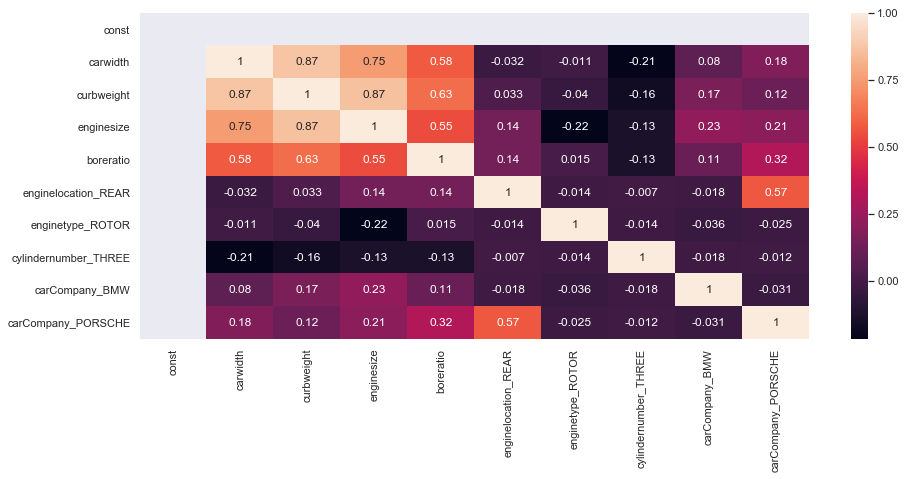

In [44]:
#Let's understand correlation using heatmap again 
plt.figure(figsize=(15,6))
sns.heatmap(x_train_new.corr(),annot=True)

*curbweight has high correlation with enginesize and carwidth ,hence dropping curbweight to reduce multicollinearity*

In [45]:
#Drop curbweight and rebuild the model 
x_train_new.drop(["curbweight"], axis = 1,inplace=True)

In [46]:
#Build model again
x_train_new = model_build(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.01e-63
Time:                        16:49:53   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [47]:
#Checking VIF values
VIFcheck(x_train_new)

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
8,carCompany_PORSCHE,1.67
4,enginelocation_REAR,1.64
5,enginetype_ROTOR,1.14
7,carCompany_BMW,1.09
6,cylindernumber_THREE,1.05


*Now,VIF of the remaining features significantly improved , however p-value of boreratio increased beyond significance level.*

In [48]:
#Drop boreratio and rebuild the model 
x_train_new.drop(["boreratio"], axis = 1,inplace=True)

In [49]:
#Build model again
x_train_new = model_build(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.04e-64
Time:                        16:49:53   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1925 

In [50]:
#Checking VIF values
VIFcheck(x_train_new)

,Features,VIF
0,const,8.41
2,enginesize,3.02
1,carwidth,2.86
3,enginelocation_REAR,1.64
7,carCompany_PORSCHE,1.59
4,enginetype_ROTOR,1.13
6,carCompany_BMW,1.09
5,cylindernumber_THREE,1.05


In [51]:
#Drop carCompany_PORSCHE and rebuild the model 
x_train_new.drop(["carCompany_PORSCHE"], axis = 1,inplace=True)

In [52]:
#Build model again
x_train_new = model_build(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.62e-64
Time:                        16:49:53   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

In [53]:
#Checking VIF values
VIFcheck(x_train_new)

,Features,VIF
0,const,8.11
2,enginesize,3.02
1,carwidth,2.75
4,enginetype_ROTOR,1.12
6,carCompany_BMW,1.09
3,enginelocation_REAR,1.08
5,cylindernumber_THREE,1.05


#### Predictor variables seems to be significant (P value < 0.05) for all the features ,Also Variance Inflation Factor looks significant(VIF <5)

#### R-squared and Adjusted R-squared are 89.7 and 89.2 respectively . Hence ,this model is able to explain 89.7 percent of the variance in the data. 

#### Driver variables significant in predicting the price of a car are :

- enginesize
- carwidth
- enginetype_ROTOR
- carCompany_BMW
- enginelocation_REAR	
- cylindernumber_THREE

### Step 4 : Residual Analysis

In [54]:
lm = sm.OLS(y_train,x_train_new).fit()
y_train_pred = lm.predict(x_train_new)
                       

Text(0.5, 0, 'Errors')

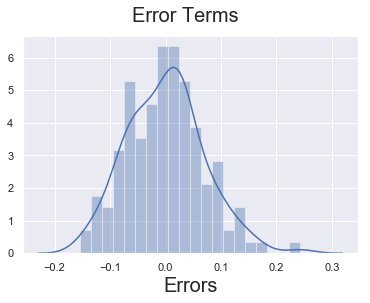

In [55]:
#Plotting Histogram
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 20) 

*Residual distribution follows normal distribution , centred at zero mean ,which inclined with our assumption .Models seems to be accurate*

### Step 5 : Prediction and Evaluation on the Test Set 

In [56]:
#Scale Test set features to range 0 to 1 
#List of numeric variables to scale

num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
# Transform the test data
df_test[num_vars] = obj.transform(df_test[num_vars])


In [57]:
#x_test ,y_test
y_test = df_test.pop('price')
x_test = df_test

In [58]:
#Using trained model  for prediction
#Dropping constant
x_train_new.drop(["const"], axis = 1,inplace=True)
x_test_new = x_test[x_train_new.columns]

In [59]:
#Add a constant
x_test_new = sm.add_constant(x_test_new)
x_test_new.head()

,const,carwidth,enginesize,enginelocation_REAR,enginetype_ROTOR,cylindernumber_THREE,carCompany_BMW
160,1.00,0.34,0.14,0,0,0,0
186,1.00,0.43,0.18,0,0,0,0
59,1.00,0.52,0.23,0,0,0,0
165,1.00,0.31,0.14,0,0,0,0
140,1.00,0.29,0.18,0,0,0,0


In [60]:
#predict
y_pred = lm.predict(x_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

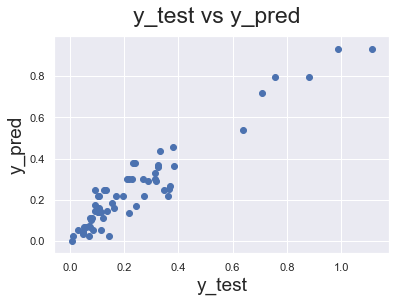

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=23)              # Plot heading 
plt.xlabel('y_test', fontsize=19)                          # X-label
plt.ylabel('y_pred', fontsize=19)                          # Y-label

Text(0, 0.5, 'Comparison')

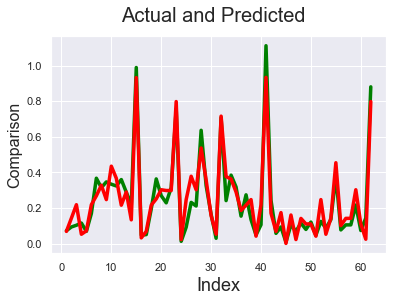

In [62]:
#Actual vs Predicted for test dataset
c = [i for i in range(1,63)]
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=3.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Comparison', fontsize=16)                          # Y-label

### Step 6: Evaluate R-Squared

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_true=y_test,y_pred=y_pred)


0.9013443522816883